<img src="http://www.evanmarie.com/content/files/notebook_images/fastai.png" width=850>

# 🤯 fast.ai & Dog Breed Image Recognition via Transfer Learning

Deep learning. Transfer learning. Mind-blowing! 

I have been working with neural networks for a little while now.  When I was introduced to the practice, I fell in love immediately. So I have been immersing myself all day every day, completing and compiling my own projects and learning from as many sources as I can find. Recently, one project I was working on led to a brief reference to the work at fast.ai. I was immediately intrigued, but I had no idea how amazed I would be when I took a deeper look into what these Aussies are up to!

<br>

I am IN LOVE with this framework.  It is a heavenly blessing to a deep learning fanatic like me. Here is one reason why: I spend a GREAT deal of time writing functions to help me streamline my model training and evaluation work, as well as countless other tasks involved in the deep learning workflow. It can get messy, especially when there are 6 different libraries I am working with and trying to remember which format my data is in where, etc. Well, the angelic humans at fast.ai have not only streamlined all that for me so that I can work with a completely organized system and analyze pretty much any data you could throw at me in minutes, but it all free and open. It is also all documented more thoroughly and cleanly than anything I have ever seen. 

<br>

fast.ai also has free educational materials for learning their system, and it is so easy to use and dive into the fun parts of this work without having to sift through learning a whole host of new syntax formats and ways of doing things. They literally just took the whole process and made it into a bullet point list of steps and impeccable functions that I can apply to any project my limitless imagination can come up with.

<br>

So here is one of my first projects with the fast.ai framework. I chose the Imagewoof dog breed dataset, which is a subset of images from 10 different dog breeds from the ImageNet collection. 

---

## Image Woof Dataset

In this dataset, we have folders of dog breeds, 10 different breeds and many photos for each breed, which will be split up as 80% for training and 20% for validation, or testing. 

Now, the first thing I would like to joyfully point out is...do you see how little I have to import? That's it. Fast.ai does all my PyTorch and all those imports that can fill a page or more of my screen. Here, I have all of 5 lines. 

In [ ]:
%%capture
!pip install nbdev

In [ ]:
from fastai.collab import *
from fastai.vision.all import *
import fastai
import nbdev
import PIL

It is easy, breezy, amazing that this one little line, and POOF! I have my dataset, locked and downloaded! Sorry...weird gun reference. My bad.

In [ ]:
path = untar_data(URLs.IMAGEWOOF_160)

Now, usually when working with images, you can have screens full of code to just get the images in place, organized, applying transforms to the images, blah blah blah! But not with fast.ai. This is it.

<br>

Here I am defining the blocks of data that I will be using. I have my images and then the labels, or categories they belong to, the dog breeds. Then I also split my data into training and validation, and I tell it where to find the labels for the training process. BOOM!

In [ ]:
data_blocks = (ImageBlock, CategoryBlock)  # defining datablocks and types
get_items = get_image_files
splitter = GrandparentSplitter(train_name='train', valid_name='val')
get_y = parent_label

This is where I define what transforms should be applied pre-processing, i.e. resize all photos to be of the same size so the model can work with them, and then the batch transformations that will be applied to all images. 

In [ ]:
individual_transforms = [Resize(448)] # initial pre-processing before batch
batch_transforms = [FlipItem(), RandomResizedCrop(128, min_scale=0.35),
                    Normalize.from_stats(*imagenet_stats)]

The images are originally categorized by breed, but the labels for the breeds are these n02087394 style codes. To me, the human working with this data, that is not a fun way to label the dog breds. So I will createa dictionary below to make this more human-readable.

In [ ]:
classes = (path/'train').ls()
classes

(#10) [Path('/root/.fastai/data/imagewoof2-160/train/n02096294'),Path('/root/.fastai/data/imagewoof2-160/train/n02087394'),Path('/root/.fastai/data/imagewoof2-160/train/n02099601'),Path('/root/.fastai/data/imagewoof2-160/train/n02088364'),Path('/root/.fastai/data/imagewoof2-160/train/n02089973'),Path('/root/.fastai/data/imagewoof2-160/train/n02111889'),Path('/root/.fastai/data/imagewoof2-160/train/n02086240'),Path('/root/.fastai/data/imagewoof2-160/train/n02115641'),Path('/root/.fastai/data/imagewoof2-160/train/n02105641'),Path('/root/.fastai/data/imagewoof2-160/train/n02093754')]

Here, I am translating the codes to dog breed labels for training and predicting.

In [ ]:
labels_dictionary = dict(
    n02105641 = 'Old English Sheepdog',
    n02111889 = 'Samoyed',
    n02093754 = 'Australian Terrier',
    n02088364 = 'Beagle',
    n02089973 = 'English Foxhound',
    n02087394 = 'Rhodesian Ridgeback',
    n02086240 = 'Shih-Tzu',
    n02096294 = 'Border Terrier',
    n02115641 = 'Dingo',
    n02099601 = 'Golden Retriever'
)


In [ ]:
first_item_class = (path/'train').ls()[5]
labels_dictionary[first_item_class.name]

'Samoyed'

And here, we can see that the labels have now been changed to acutal dog breeds. I now am telling the model where to find those labels when it is time for training.

In [ ]:
get_y = Pipeline([parent_label, labels_dictionary.__getitem__])

And this is where I construct the datablock-building process and put it all together for training.

In [ ]:
block = DataBlock(blocks = data_blocks,
                  get_items = get_items, 
                  get_y = get_y, 
                  item_tfms = individual_transforms, 
                  batch_tfms = batch_transforms)

In [ ]:
dls = block.dataloaders(path, bs=64)

Here is an example from a batch of photos of the dogs and their labels that the model will learn from.

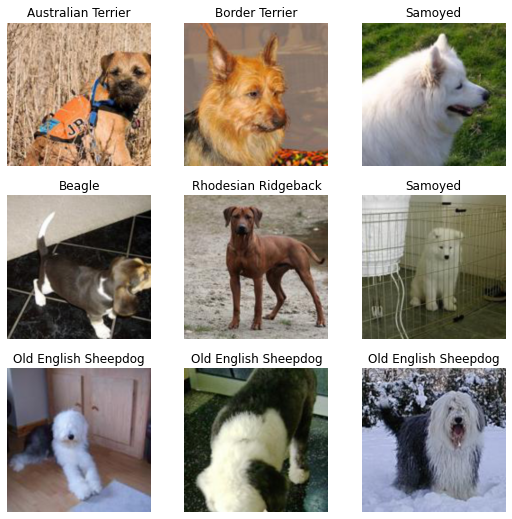

In [ ]:
dls.show_batch()

Now, I am defining the model. I am using transfer learning here, meaning I am using a model that is been pre-trained and is known to be robust at image recognition. I will rely on its pre-trained knowledge for a large amount of image recognition here, but then I will fine tune this model with my training data below. 

In [ ]:
%%capture
learn = cnn_learner(dls, resnet34, metrics=[accuracy])

And here is the training, or fine tuning, process. And with only 7 epochs, the model is almost 94% accurate on the validation data at discerning the dog breeds from the images. 93.82% accurate to be exact. I don't know about you, but I am impressed!

In [ ]:
learn.fine_tune(7)

epoch,train_loss,valid_loss,accuracy,time
0,0.773962,0.361787,0.885328,02:33


epoch,train_loss,valid_loss,accuracy,time
0,0.403532,0.282379,0.914672,03:21
1,0.349858,0.358873,0.888803,03:21
2,0.297570,0.351726,0.894981,03:21
3,0.196490,0.267446,0.915444,03:21
4,0.124738,0.246941,0.926255,03:20
5,0.070275,0.236525,0.936293,03:21
6,0.039113,0.236033,0.938224,03:21


And here are some examples of the extremely accurate model predicting the dog breeds, which we humans can visually verify are correct. You can see I have coded it so that it prints the predicted label from the model, and then the images seem to be just as predicted! What a smart little model!

Samoyed


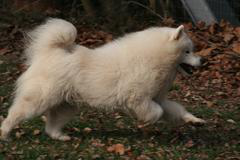

In [ ]:
dog_01 = get_image_files(path)[4444]
print(learn.predict(dog_01)[0])
img = PIL.Image.open(dog_01)
img

Dingo


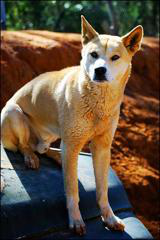

In [ ]:
dog_02 = get_image_files(path)[6666]
print(learn.predict(dog_02)[0])
img = PIL.Image.open(dog_02)
img

Shih-Tzu


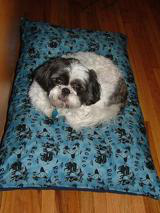

In [ ]:
dog_03 = get_image_files(path)[5555]
print(learn.predict(dog_03)[0])
img = PIL.Image.open(dog_03)
img

Rhodesian Ridgeback


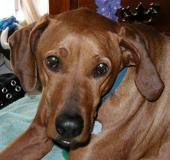

In [ ]:
dog_04 = get_image_files(path)[1111]
print(learn.predict(dog_04)[0])
img = PIL.Image.open(dog_04)
img

Golden Retriever


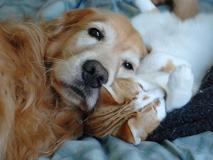

In [ ]:
dog_05 = get_image_files(path)[9999]
print(learn.predict(dog_05)[0])
img = PIL.Image.open(dog_05)
img

Beagle


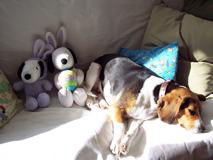

In [ ]:
dog_06 = get_image_files(path)[3323]
print(learn.predict(dog_06)[0])
img = PIL.Image.open(dog_06)
img

Old English Sheepdog


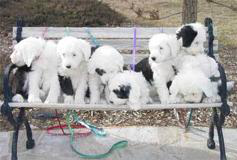

In [ ]:
dog_07 = get_image_files(path)[7777]
print(learn.predict(dog_07)[0])
img = PIL.Image.open(dog_07)
img

Golden Retriever


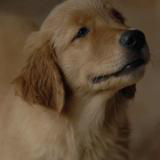

In [ ]:
dog_08 = get_image_files(path)[2543]
print(learn.predict(dog_08)[0])
img = PIL.Image.open(dog_08)
img

So there you have it! This is just a glimpse at the power of fast.ai. But I hope it has achieved my goal of at least grabbing your interest. I look forward to presenting more in the very near future. So check back soon for more high accuracy percentages and awesome deep learning projects!